***20BEC1131***
*DAC Task 1 - Classification Problem - Caffeine content in drinks*

In [18]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#reading csv
df1 = pd.read_csv("..\data\caffeine.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [29]:
df1 = df1.drop(columns=["drink"])
df1.nunique()

Volume (ml)       70
Calories          98
Caffeine (mg)    162
type               6
dtype: int64

In [31]:
type_en = pd.get_dummies(df1["type"])
df2 = df1.copy()
df2.drop("type", axis=1, inplace=True)
df2 = pd.concat([df2, type_en], axis=1)
df2.head()

,Volume (ml),Calories,Caffeine (mg),Coffee,Energy Drinks,Energy Shots,Soft Drinks,Tea,Water
0,256.993715,0,277,1,0,0,0,0,0
1,250.191810,0,145,1,0,0,0,0,0
2,250.191810,150,100,1,0,0,0,0,0
3,250.191810,0,430,1,0,0,0,0,0
4,250.191810,0,66,1,0,0,0,0,0


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Volume (ml)    610 non-null    float64
 1   Calories       610 non-null    int64  
 2   Caffeine (mg)  610 non-null    int64  
 3   type           610 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 19.2+ KB


*Plotting some graphs*

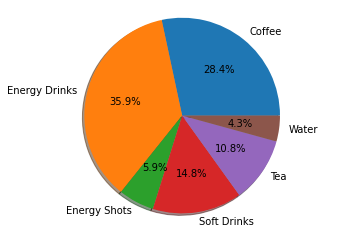

In [33]:
labels = df1['type'].astype('category').cat.categories.tolist()
counts = df1['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

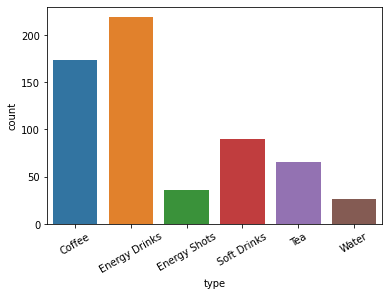

In [42]:
cp1 = sns.countplot(x='type', data=df1)
cp1.set_xticklabels(cp1.get_xticklabels(), rotation=30)
plt.show()

In [43]:
#splitting 80:20
splitval = round(610*0.8) + 1 
dat_80, dat_20 = df1.iloc[:splitval,:], df1.iloc[splitval:610,:]
dat_80.info()
print("\n")
dat_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Volume (ml)    489 non-null    float64
 1   Calories       489 non-null    int64  
 2   Caffeine (mg)  489 non-null    int64  
 3   type           489 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 15.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 489 to 609
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Volume (ml)    121 non-null    float64
 1   Calories       121 non-null    int64  
 2   Caffeine (mg)  121 non-null    int64  
 3   type           121 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ KB


In [44]:
#exporting
dat_80.to_csv("../data/caffeine_final_train.csv", index=False)
dat_20.to_csv("../data/caffeine_final_test.csv", index=False)